In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("YourCabs.csv")

In [3]:
df.head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [4]:
df.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
travel_type_id             0
package_id             35881
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [5]:
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'travel_type_id', 'package_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [6]:
df.drop(columns=['id', 'user_id', 'package_id', 'from_city_id', 'to_city_id'],inplace=True)

In [7]:
df.shape

(43431, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     43431 non-null  int64  
 1   travel_type_id       43431 non-null  int64  
 2   from_area_id         43343 non-null  float64
 3   to_area_id           34293 non-null  float64
 4   from_date            43431 non-null  object 
 5   online_booking       43431 non-null  int64  
 6   mobile_site_booking  43431 non-null  int64  
 7   booking_created      43431 non-null  object 
 8   from_lat             43338 non-null  float64
 9   from_long            43338 non-null  float64
 10  to_lat               34293 non-null  float64
 11  to_long              34293 non-null  float64
 12  Car_Cancellation     43431 non-null  int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 4.3+ MB


In [9]:
df.isnull().sum()

vehicle_model_id          0
travel_type_id            0
from_area_id             88
to_area_id             9138
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 9138
to_long                9138
Car_Cancellation          0
dtype: int64

In [10]:
cols_to_impute=['from_area_id','to_area_id','from_lat','from_long','to_lat','to_long']

In [11]:
df[cols_to_impute] = df[cols_to_impute].fillna(df[cols_to_impute].median())

In [12]:
df.isnull().sum()

vehicle_model_id       0
travel_type_id         0
from_area_id           0
to_area_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

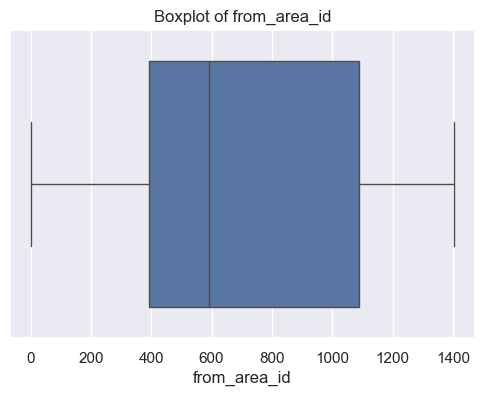

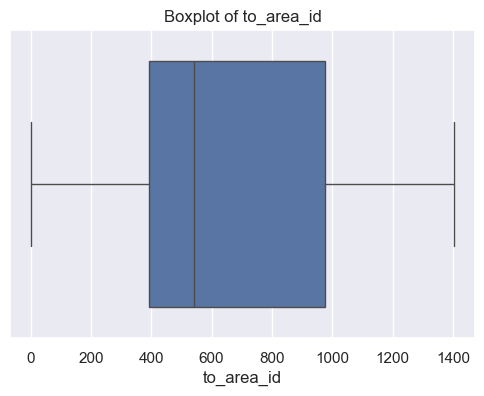

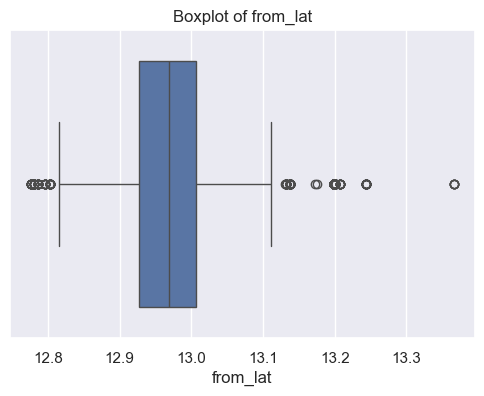

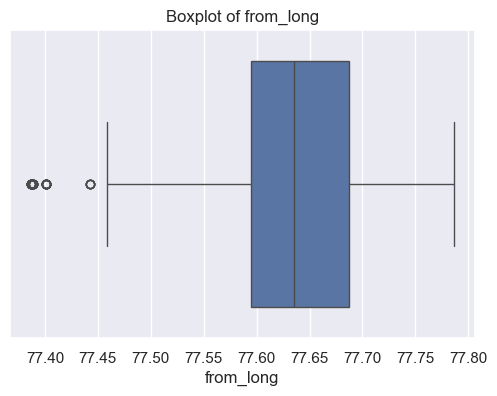

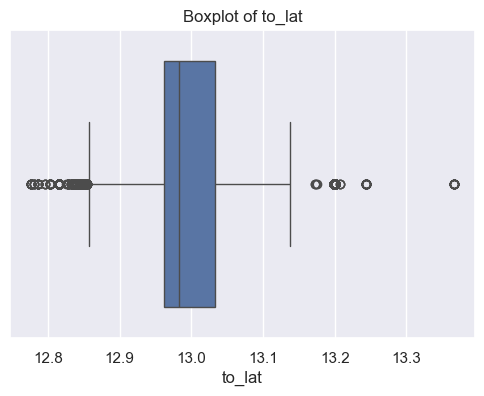

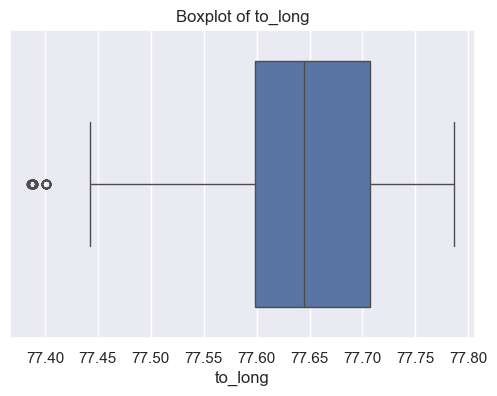

In [13]:
for col in cols_to_impute:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

In [14]:
df['from_date'] = pd.to_datetime(df['from_date'], errors='coerce')

In [15]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('Car_Cancellation')  # Exclude target

In [16]:
numeric_cols

['vehicle_model_id',
 'travel_type_id',
 'from_area_id',
 'to_area_id',
 'online_booking',
 'mobile_site_booking',
 'from_lat',
 'from_long',
 'to_lat',
 'to_long']

In [17]:
def cap_outliers(df,col):
    lower_limit=df[col].quantile(0.01)
    upper_limit=df[col].quantile(0.99)
    df[col]=df[col].clip(lower_limit,upper_limit)
    

In [18]:
for col in numeric_cols:
    cap_outliers(df,col)

In [19]:
# for col in numeric_cols:
#     sns.boxplot(df[col])
#     plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [21]:
x= df.drop(columns=['Car_Cancellation'])
y=df['Car_Cancellation']

In [25]:
x = x.select_dtypes(include=['int64', 'float64'])  # only keep numeric

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [27]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [28]:
x.dtypes

vehicle_model_id         int64
travel_type_id           int64
from_area_id           float64
to_area_id             float64
online_booking           int64
mobile_site_booking      int64
from_lat               float64
from_long              float64
to_lat                 float64
to_long                float64
dtype: object

In [29]:
logit= LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_predict_train=logit.predict(x_train)
y_predict_test=logit.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print ("Training accuracy score:",accuracy_score(y_train,y_predict_train))

Training accuracy score: 0.9278724384066314


In [35]:
print("Testing accuracy score :",accuracy_score(y_test,y_predict_test))

Testing accuracy score : 0.9279382986071141


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print('\n Training Classification report: \n',classification_report(y_train,y_predict_train))


 Training Classification report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     32238
           1       0.00      0.00      0.00      2506

    accuracy                           0.93     34744
   macro avg       0.46      0.50      0.48     34744
weighted avg       0.86      0.93      0.89     34744



In [39]:
print('\n Training Confusion Matrix:\n',confusion_matrix( y_train,y_predict_train))


 Training Confusion Matrix:
 [[32238     0]
 [ 2506     0]]


In [41]:
print('\nTesting_Classification_Report:\n',classification_report(y_test,y_predict_test))


Testing_Classification_Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.00      0.00      0.00       626

    accuracy                           0.93      8687
   macro avg       0.46      0.50      0.48      8687
weighted avg       0.86      0.93      0.89      8687



In [42]:
print('\n Testing Confusion Matrix:\n',confusion_matrix( y_test,y_predict_test))


 Testing Confusion Matrix:
 [[8061    0]
 [ 626    0]]


In [43]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt_clf= DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred_train=dt_clf.predict(x_train)
y_pred_test=dt_clf.predict(x_test)

In [45]:
confusion_matrix(y_test,y_pred_test)

array([[7726,  335],
       [ 502,  124]])

In [46]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8061
           1       0.27      0.20      0.23       626

    accuracy                           0.90      8687
   macro avg       0.60      0.58      0.59      8687
weighted avg       0.89      0.90      0.90      8687



In [63]:
print("Training_accuracy_score:",accuracy_score(y_train,y_pred_train))

Training_accuracy_score: 0.970987796454064


In [64]:
print("Testing_accuracy_score:",accuracy_score(y_test,y_pred_test))

Testing_accuracy_score: 0.9036491308852308


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,criterion='entropy',
                          bootstrap=True,oob_score=False)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [52]:
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)

In [53]:
print(confusion_matrix(y_train,y_pred_train_rf))

[[32164    74]
 [  934  1572]]


In [54]:
print(confusion_matrix(y_test,y_pred_test_rf))

[[7942  119]
 [ 567   59]]


In [55]:
print(classification_report(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     32238
           1       0.96      0.63      0.76      2506

    accuracy                           0.97     34744
   macro avg       0.96      0.81      0.87     34744
weighted avg       0.97      0.97      0.97     34744



In [56]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8061
           1       0.33      0.09      0.15       626

    accuracy                           0.92      8687
   macro avg       0.63      0.54      0.55      8687
weighted avg       0.89      0.92      0.90      8687



In [66]:
print("Training_accuracy_score:",accuracy_score(y_train, y_pred_train_rf))

Training_accuracy_score: 0.970987796454064


In [67]:
print("Testing_accuracy_score:",accuracy_score(y_test, y_pred_test_rf))

Testing_accuracy_score: 0.9210314262691378


In [59]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rf, x_train, y_train, cv=10)
accuracy.mean()

np.float64(0.9222887472405494)

In [65]:
print("Training Accuracy : ", accuracy.mean())
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test_rf))

Training Accuracy :  0.9222887472405494
Test Accuracy:  0.9210314262691378


MODEL ACCURACY

1.LOGISTIC REGRESSION:
Training accuracy score: 0.9278724384066314
Testing accuracy score : 0.9279382986071141
2.DECISION TREE CLASSIFIER
Training_accuracy_score: 0.970987796454064
Testing_accuracy_score: 0.9036491308852308
3.RANDOM FOREST CLASSIFER
Training_accuracy_score: 0.970987796454064
Testing_accuracy_score: 0.9210314262691378